In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Path to the service account key file
key_path = "../credentials/dbt_service_account.json"

In [7]:
# Initialize BigQuery client
client = bigquery.Client.from_service_account_json(key_path)

In [10]:
# Query the final table
query =  """
SELECT *
FROM `amiable-dynamo-461319-g1.analytics_onboarding_us.mart_onboarding_funnel`
"""
df = client.query(query).to_dataframe()

/Users/mariroci/Library/Caches/pypoetry/virtualenvs/onboarding-funnel-analysis-iGMZaZzf-py3.13/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [11]:
df.head()

,user_id,viewed_product,added_to_cart,removed_from_cart,removed_without_prior_steps,added_removed_without_view,added_without_view
0,724031190660439629,False,False,False,False,False,False
1,1513574659863671308,False,False,False,False,False,False
2,2827498353821012092,False,False,False,False,False,False
3,103905010654987355,False,False,False,False,False,False
4,0471440166975172605,False,False,False,False,False,False


In [12]:
# Plot steps
step_counts = {
    "Product Viewed": df["viewed_product"].sum(),
    "Added to Cart": df["added_to_cart"].sum(),
    "Removed from Cart": df["removed_from_cart"].sum(),  
}

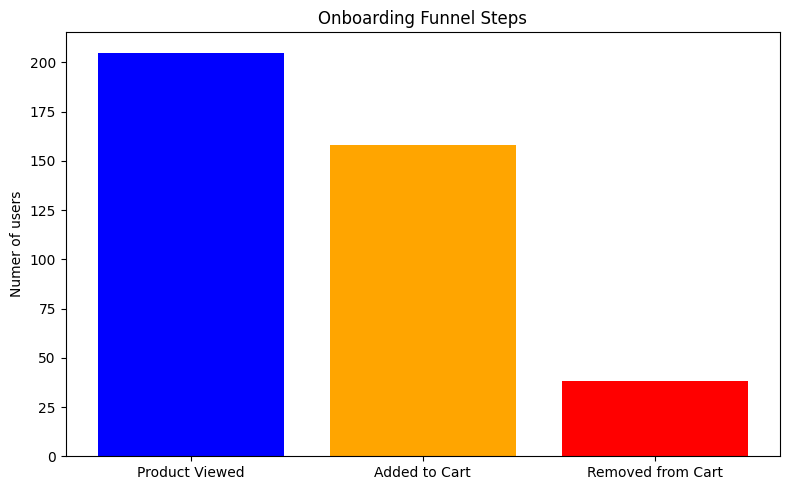

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(step_counts.keys(), step_counts.values(), color=['blue', 'orange', 'red'])
plt.title("Onboarding Funnel Steps")
plt.ylabel("Numer of users")
plt.tight_layout()
plt.show()